In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
login_df = pd.read_csv('6_1_bharatcash_overall_daily_login.csv')
referral_df = pd.read_csv('6_2_from_referral_bharatcash.csv')
ref_rev_df = pd.read_csv('6_3_rev_from_referral_bharatcash.csv')
all_rev_df = pd.read_csv('6_4_rev_overall_bharatcash.csv')

In [10]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286240 entries, 0 to 286239
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   adv_id  286190 non-null  object
 1   app_id  286240 non-null  object
 2   day     286240 non-null  object
dtypes: object(3)
memory usage: 6.6+ MB


In [11]:
referral_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   referre_adv_id  41256 non-null  object
 1   created_at      41259 non-null  object
dtypes: object(2)
memory usage: 644.8+ KB


In [12]:
ref_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41469 entries, 0 to 41468
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   adv_id          41465 non-null  object 
 1   revenue_in_usd  41469 non-null  float64
dtypes: float64(1), object(1)
memory usage: 648.1+ KB


In [14]:
all_rev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220612 entries, 0 to 220611
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   adv_id          220580 non-null  object 
 1   revenue_in_usd  220612 non-null  float64
 2   user_type       220612 non-null  object 
dtypes: float64(1), object(2)
memory usage: 5.0+ MB


In [15]:
referred_users = set(referral_df['referre_adv_id'])

In [16]:
all_rev_df['user_type'] = all_rev_df['adv_id'].apply(lambda x: 'Referred' if x in referred_users else 'Non-Referred')

In [17]:
rpu_df = all_rev_df.groupby('user_type')['revenue_in_usd'].agg(['sum', 'count']).reset_index()

In [18]:
rpu_df['RPU'] = rpu_df['sum'] / rpu_df['count']

In [19]:
print(rpu_df[['user_type', 'RPU']])

      user_type       RPU
0  Non-Referred  0.402418
1      Referred  0.203959


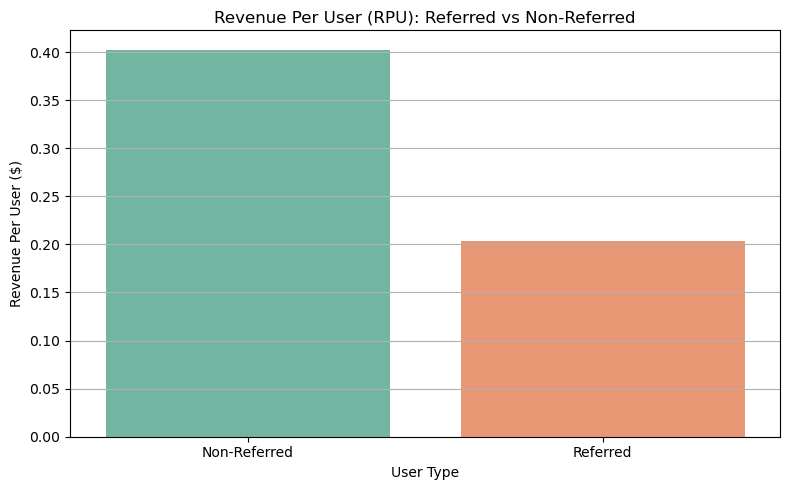

In [20]:
plt.figure(figsize=(8, 5))
sns.barplot(data=rpu_df, x='user_type', y='RPU', palette='Set2')
plt.title('Revenue Per User (RPU): Referred vs Non-Referred')
plt.ylabel('Revenue Per User ($)')
plt.xlabel('User Type')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Assumptions Made:
Users in referre_adv_id are treated as referred users.

Revenue is linked to users via adv_id only.

RPU is calculated only for users with available revenue data.

Revenue is assumed to be in USD and directly comparable.

Each user has one cumulative revenue entry.

Analysis focuses only on revenue, not user engagement or retention.